<a href="https://colab.research.google.com/github/GastonRAraujo/Materia-Ap_Maq/blob/master/TP3/TP3_Ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

#Utilidad
from sklearn.model_selection import train_test_split

In [ ]:
#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
attributes_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


La idea ahora es aplicar el mismo procedimiento que antes pero ya no en 2D sino en 13D

Primero voy a evitar utilizar nombre y artista aunque podría de alguna forma extender este procedimiento otorgandole un numero a cada artista: 
ej: the beatles = 0, rolling stone = 1, etc)

Grafico algunas componentes para ver si se observa algun comportamiento peculiar en ellas.

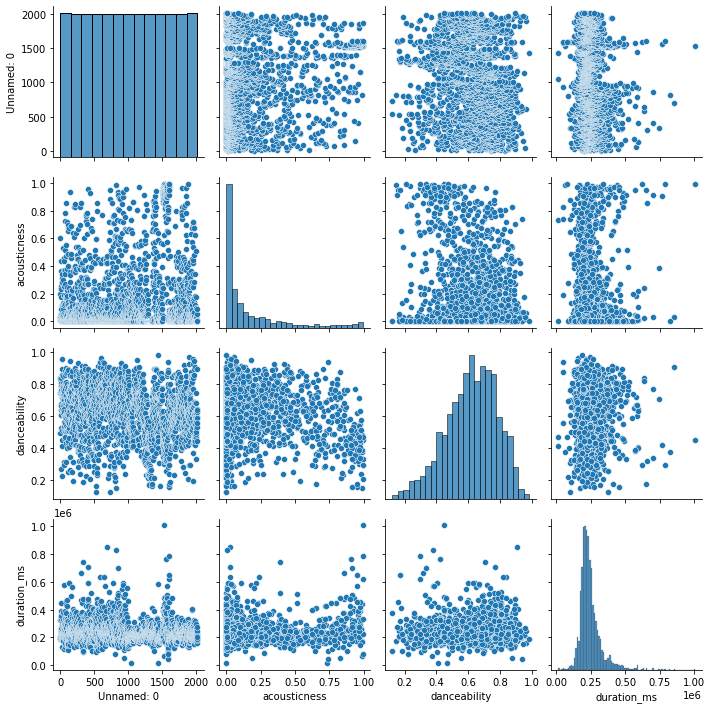

In [ ]:
sns.pairplot(attributes_spotify[['Unnamed: 0',	'acousticness',	'danceability',	'duration_ms']])

Aplico StandarScalert de scikit-learn para normalizar mis datos.

In [ ]:
from sklearn.preprocessing import StandardScaler

#creo un data frame solo con la informacion que me interesa
#y lo transformo a numpy para simplicidad al usar scikitlearn

data = attributes_spotify
y = data['target']

data = data.drop(columns = ['target', 'song_title', 'artist'])

X = data.to_numpy()
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

In [ ]:
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

N = data.shape[0]

sqrtN = int(N ** 0.5)

print('N = ', N)
print('sqrtN = ', sqrtN)

n_neighbors= np.arange(1, sqrtN+2,4)

print('n_neighbors =', n_neighbors)

p = [1,2]

param_grid = dict(n_neighbors=n_neighbors, p=p)


knn = KNeighborsClassifier()

gs = GridSearchCV(knn, param_grid, cv = 10,)


gs_result = gs.fit(X_train, y_train)

N =  2017
sqrtN =  44
n_neighbors = [ 1  5  9 13 17 21 25 29 33 37 41 45]


In [ ]:
#Print The value of best Hyperparameters
print('Best p:', gs_result.best_estimator_.get_params()['p'])
print('Best n_neighbors:',gs_result.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 9


In [ ]:
knn = KNeighborsClassifier(n_neighbors=gs_result.best_estimator_.get_params()['n_neighbors'],
                           p=gs_result.best_estimator_.get_params()['p'])
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')

In [ ]:
from sklearn import metrics
#Predigo usando X_test
y_predicted = knn.predict(X_test)

print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       492
           1       0.98      0.90      0.94       517

    accuracy                           0.94      1009
   macro avg       0.94      0.94      0.94      1009
weighted avg       0.94      0.94      0.94      1009




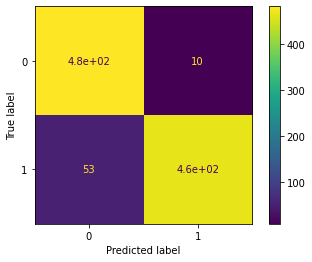

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_predicted)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

In [ ]:
n = 2  # for 2 random indices
index = np.random.choice(X_test.shape[0], n, replace=False)

X_pred = X_test[index]
y_pred = y_test[index]

In [ ]:
# hacemos la predicción
target_names =  ['dislike', 'like']

asd = knn.predict(X_pred)

for l in range(asd.shape[0]):
  print("Expected target: ", target_names[asd[l]])
  print('Target value: ', target_names[y_pred[l]])
  print("\n")

Expected target:  like
Target value:  like


Expected target:  dislike
Target value:  dislike


